# 実習6
### CBOWをkerasで実装

### 参照
(https://github.com/nzw0301/keras-examples/blob/master/CBoW.ipynb)


In [0]:
import numpy as np
np.random.seed(13)

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

/Users/Niioka/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
# 学習データの準備1

#get_fileでalice.txtをダウンロード (get_fileについては-->https://keras.io/ja/utils/)
path = get_file('alice.txt', origin='http://www.gutenberg.org/files/11/11-0.txt')

#readlines() – ファイルを全て読み込み、1行毎に処理を行う。1000行まで読み込む。
corpus = open(path).readlines()[:1000]

corpus

['\ufeffProject Gutenberg’s Alice’s Adventures in Wonderland, by Lewis Carroll\n',
 '\n',
 'This eBook is for the use of anyone anywhere at no cost and with\n',
 'almost no restrictions whatsoever.  You may copy it, give it away or\n',
 're-use it under the terms of the Project Gutenberg License included\n',
 'with this eBook or online at www.gutenberg.org\n',
 '\n',
 '\n',
 'Title: Alice’s Adventures in Wonderland\n',
 '\n',
 'Author: Lewis Carroll\n',
 '\n',
 'Posting Date: June 25, 2008 [EBook #11]\n',
 'Release Date: March, 1994\n',
 'Last Updated: October 6, 2016\n',
 '\n',
 'Language: English\n',
 '\n',
 'Character set encoding: UTF-8\n',
 '\n',
 '*** START OF THIS PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'ALICE’S ADVENTURES IN WONDERLAND\n',
 '\n',
 'Lewis Carroll\n',
 '\n',
 'THE MILLENNIUM FULCRUM EDITION 3.0\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'CHAPTER I. Down the Rabbit-Hole\n',
 '\n'

In [0]:
# 学習データの準備2

#spaceが2個以上の要素を返す。つまり、単語が3つ以上の文章。
corpus = [sentence for sentence in corpus if sentence.count(' ') >= 2]

corpus

['\ufeffProject Gutenberg’s Alice’s Adventures in Wonderland, by Lewis Carroll\n',
 'This eBook is for the use of anyone anywhere at no cost and with\n',
 'almost no restrictions whatsoever.  You may copy it, give it away or\n',
 're-use it under the terms of the Project Gutenberg License included\n',
 'with this eBook or online at www.gutenberg.org\n',
 'Title: Alice’s Adventures in Wonderland\n',
 'Author: Lewis Carroll\n',
 'Posting Date: June 25, 2008 [EBook #11]\n',
 'Release Date: March, 1994\n',
 'Last Updated: October 6, 2016\n',
 'Character set encoding: UTF-8\n',
 '*** START OF THIS PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***\n',
 'ALICE’S ADVENTURES IN WONDERLAND\n',
 'THE MILLENNIUM FULCRUM EDITION 3.0\n',
 'CHAPTER I. Down the Rabbit-Hole\n',
 'Alice was beginning to get very tired of sitting by her sister on the\n',
 'bank, and of having nothing to do: once or twice she had peeped into the\n',
 'book her sister was reading, but it had no pictures or conve

In [0]:
# 学習データの準備3

#単語列を単語ID列に変換
#Tokenizerを作成
tokenizer = Tokenizer() # 例えば引数として num_words = 100とすると単語IDを100までしか設定しない。引数がないときは最大値をとってくれる。
#単語のインデックスを構築
tokenizer.fit_on_texts(corpus)
#文字列を整数のインデックスのリストに変換
corpus = tokenizer.texts_to_sequences(corpus)

#corpusが単語IDのリストになってることを確認
corpus

[[781, 782, 186, 321, 11, 322, 68, 510, 511],
 [23, 323, 33, 18, 1, 162, 8, 783, 784, 20, 40, 785, 2, 26],
 [266, 40, 786, 787, 15, 512, 788, 7, 402, 7, 163, 52],
 [789, 162, 7, 187, 1, 790, 8, 1, 513, 403, 791, 792],
 [26, 23, 323, 52, 793, 20, 794, 403, 795],
 [796, 186, 321, 11, 322],
 [797, 510, 511],
 [798, 514, 799, 800, 801, 323, 802],
 [803, 514, 804, 805],
 [138, 806, 807, 808, 809],
 [810, 267, 811, 812, 813],
 [814, 8, 23, 513, 403, 323, 186, 321, 11, 322],
 [186, 321, 11, 322],
 [1, 815, 816, 817, 818, 819],
 [268, 10, 28, 1, 61, 269],
 [12, 9, 515, 3, 63, 29, 237, 8, 516, 68, 13, 517, 27, 1],
 [518, 2, 8, 270, 146, 3, 42, 108, 52, 820, 4, 19, 519, 64, 1],
 [238, 13, 517, 9, 821, 24, 7, 19, 40, 324, 52, 822, 11],
 [7, 109, 44, 33, 1, 162, 8, 5, 238, 6, 47, 12, 823, 324, 52],
 [31, 4, 9, 520, 11, 13, 325, 271, 16, 188, 16, 4, 59, 18, 1],
 [326, 239, 123, 13, 327, 29, 404, 2, 521, 522, 1, 824],
 [8, 272, 5, 825, 826, 69, 22, 523, 1, 524, 8, 164, 35, 2],
 [827, 1, 828, 51, 212

In [0]:
#単語IDの数(単語数)をカウント
nb_samples = sum(len(s) for s in corpus)

# 次元数 = 語彙数 (単語IDの種類)
# (後続処理で、空文字分の0が増えるため+1する)
vocab_size = len(tokenizer.word_index) + 1

#windowサイズの設定
window_size = 1

In [0]:
# 学習データを作成
#def generate_data(corpus, window_size, vocab_size):
contexts = []
targets   = []   
for words in corpus:
    L = len(words)
    for index, word in enumerate(words): 
        s = index - window_size
        e = index + window_size + 1
            
        #コンテキストとtargetの作成
        contexts.append([words[i] for i in range(s, e) if 0 <= i < L and i != index])
        targets.append(word)

        x_train = sequence.pad_sequences(contexts, maxlen=window_size*2) #sequenceが全て同じ長さになるよう0で埋める(パディング)
        y_train = np_utils.to_categorical(targets, vocab_size) #one-hotデータに変換

In [0]:
#x_train(context)とy_train(target)を見てみる
print(x_train.shape, y_train.shape)
print(x_train[0:7])
print(y_train[0:7])
print(y_train[0][781])
print(y_train[1][782])
print(y_train[2][186])

#単語IDの最大値が1597とわかる(語彙数は1596)

(9259, 2) (9259, 1597)
[[  0 782]
 [781 186]
 [782 321]
 [186  11]
 [321 322]
 [ 11  68]
 [322 510]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1.0
1.0
1.0


In [0]:
# ハイパーパラメータ
hidden_size = 100
batch_size = 32
max_epoch = 50

In [0]:
#　学習を行う

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=hidden_size, input_length=window_size*2))
model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(hidden_size,))) #k.meanは要素の平均を計算
model.add(Dense(vocab_size, activation='softmax'))
model.summary()
#(Embedding)のparameter数がちゃんと1597(語彙数)x 100(中間層のノード数)になっている

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2, 100)            159700    
_________________________________________________________________
lambda_1 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1597)              161297    
Total params: 320,997
Trainable params: 320,997
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [0]:
# 学習
hist = model.fit(x_train, y_train, 
                 batch_size=batch_size, 
                 epochs=max_epoch,
                 verbose=1,
                 validation_split=0.1)

Train on 8333 samples, validate on 926 samples
Epoch 1/50
8333/8333 [==============================] - 1s 123us/step - loss: 7.0500 - acc: 0.0538 - val_loss: 6.6270 - val_acc: 0.0508
Epoch 2/50
8333/8333 [==============================] - 1s 84us/step - loss: 6.1125 - acc: 0.0463 - val_loss: 6.3824 - val_acc: 0.0551
Epoch 3/50
8333/8333 [==============================] - 1s 83us/step - loss: 5.7994 - acc: 0.0648 - val_loss: 6.2797 - val_acc: 0.0832
Epoch 4/50
8333/8333 [==============================] - 1s 91us/step - loss: 5.5582 - acc: 0.0930 - val_loss: 6.1577 - val_acc: 0.1069
Epoch 5/50
8333/8333 [==============================] - 1s 84us/step - loss: 5.3151 - acc: 0.1190 - val_loss: 6.0551 - val_acc: 0.1296
Epoch 6/50
8333/8333 [==============================] - 1s 84us/step - loss: 5.0816 - acc: 0.1432 - val_loss: 5.9734 - val_acc: 0.1307
Epoch 7/50
8333/8333 [==============================] - 1s 84us/step - loss: 4.8654 - acc: 0.1579 - val_loss: 5.9215 - val_acc: 0.1328
Epoch 8

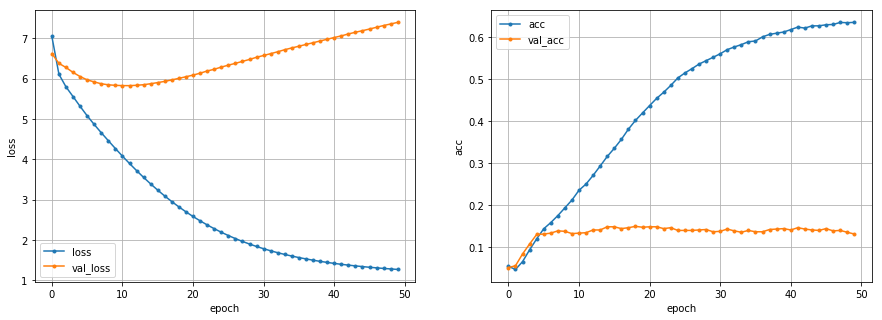

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# lossのグラフ
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(range(max_epoch), loss, marker='.', label='loss')
plt.plot(range(max_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

# accuracyのグラフ
plt.subplot(122)
plt.plot(range(max_epoch), acc, marker='.', label='acc')
plt.plot(range(max_epoch), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [0]:
#重みを保存するファイルを作る
f = open('CBOW_vectors.txt' ,mode='w') 
f.write('{} {}\n'.format(vocab_size-1, hidden_size)) #{}にそれぞれvocab_size-1とhidden_sizeが書き込まれる。
#open()の引数modeを'w'とすると書き込み用としてファイルが開かれる。
#ファイルが存在しなければ新規作成、存在していれば上書き（既存の内容は削除）で保存される。

9

In [0]:
vectors = model.get_weights()[0] #入力層と中間層の間の重みの取得
for word, i in tokenizer.word_index.items(): 
    str_vec = ' '.join(map(str, list(vectors[i, :])))
    f.write('{} {}\n'.format(word, str_vec))
f.close()

#tokenizer.word_index.items()は単語と単語IDのdictionary
#str_vecは各word毎の重みベクトル<--これと単語をセットにして.txtファイルとして保存

In [0]:
#tokenizer.word_index.items()の中身を見る
tokenizer.word_index.items()

dict_items([('the', 1), ('and', 2), ('to', 3), ('she', 4), ('a', 5), ('’', 6), ('it', 7), ('of', 8), ('was', 9), ('i', 10), ('in', 11), ('alice', 12), ('her', 13), ('that', 14), ('you', 15), ('as', 16), ('said', 17), ('for', 18), ('had', 19), ('at', 20), ('little', 21), ('be', 22), ('this', 23), ('but', 24), ('all', 25), ('with', 26), ('on', 27), ('down', 28), ('very', 29), ('out', 30), ('so', 31), ('not', 32), ('is', 33), ('herself', 34), ('up', 35), ('mouse', 36), ('me', 37), ('about', 38), ('one', 39), ('no', 40), ('if', 41), ('do', 42), ('‘i', 43), ('what', 44), ('they', 45), ('then', 46), ('thought', 47), ('way', 48), ('again', 49), ('like', 50), ('when', 51), ('or', 52), ('there', 53), ('see', 54), ('know', 55), ('went', 56), ('how', 57), ('here', 58), ('could', 59), ('think', 60), ('rabbit', 61), ('time', 62), ('get', 63), ('into', 64), ('quite', 65), ('were', 66), ('them', 67), ('by', 68), ('would', 69), ('oh', 70), ('must', 71), ('my', 72), ('i’m', 73), ('now', 74), ('thing', 

In [0]:
# gensimを使って学習したCBOWの重み(単語の分散表現)を取り出す
import gensim
word2vec = gensim.models.KeyedVectors.load_word2vec_format('./CBOW_vectors.txt', binary=False)

In [0]:
# 入力した単語と近いベクトルを列挙する
word2vec.most_similar(positive=['not'])

/Users/Niioka/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('nor', 0.5902115702629089),
 ('stigand', 0.5540261268615723),
 ('feeling', 0.5229634642601013),
 ('tale', 0.4807059168815613),
 ('can’t', 0.47442078590393066),
 ('chain', 0.45854058861732483),
 ('they’ll', 0.4231773018836975),
 ('hoped', 0.4148193597793579),
 ('i’d', 0.41418004035949707),
 ('pope', 0.41221606731414795)]

#### おまけ

gensimを使うとwikipediaを学習済みの公開モデルを使うことができる

(参考)　http://kento1109.hatenablog.com/entry/2017/11/15/230004

In [0]:
import urllib.request 

url = "https://www.dropbox.com/s/exdl3wc83n2mfia/entity_vector.zip?dl=0" # 保存したいファイルのURLを指定 (dropboxのURLを指定する際は、最後のdl=0をdl=1に設定する)
save_name = "entity_vector.zip" # byori_dataset.zipという名前で保存される。
 
# ダウンロードを実行
urllib.request.urlretrieve(url, save_name)

In [0]:
#uploadしたzipファイルを解凍する
import zipfile
with zipfile.ZipFile("entity_vector.zip","r") as zip_ref:
    zip_ref.extractall("") #""の中にはディレクトリのpathが入る

In [0]:
from gensim.models import KeyedVectors
model_dir = 'entity_vector/entity_vector.model.bin'
model = KeyedVectors.load_word2vec_format(model_dir, binary=True)
similar_rugby_list = model.most_similar(u'[ラグビー]')
for similar_set in similar_rugby_list:
    print (similar_set[0])
    print (similar_set[1])

ラグビー
0.7684316039085388
[サッカー]
0.7571812868118286
[アイスホッケー]
0.719829797744751
[ハンドボール]
0.7171785235404968
[バレーボール]
0.7139065265655518
[バスケットボール]
0.7011639475822449
[女子野球]
0.6983809471130371
[ソフトボール]
0.6887843608856201
サッカー
0.6880793571472168
[水球]
0.6868013143539429


/Users/Niioka/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from gensim.models import KeyedVectors
model_dir = 'entity_vector/entity_vector.model.bin'
model = KeyedVectors.load_word2vec_format(model_dir, binary=True)
similar_rugby_list = model.most_similar(positive=[u'[新宿]',u'[大阪府]'],negative=[u'[東京都]'])
for similar_set in similar_rugby_list:
    print (similar_set[0])
    print (similar_set[1])

[梅田]
0.6829696297645569
[ミナミ]
0.6623619794845581
[日本橋_(大阪市)]
0.6565461158752441
[心斎橋]
0.655109167098999
[千日前]
0.645991861820221
[難波]
0.6324416995048523
阿倍野
0.6287933588027954
[新世界_(大阪)]
0.6217558979988098
[北新地]
0.6190609335899353
[キタ]
0.6080436706542969


/Users/Niioka/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


#### おまけ2
UMAPという圧縮手法を使って重みを2次元まで圧縮し、単語の分散表現を取得して表示

pip install umap-learnでインストールする必要がある

In [0]:
# 分散表現の取得
w2v = model.get_weights()[0]

# クラスタリング
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=529).fit(w2v)

# 次元圧縮
from umap import UMAP
w2v_umap = UMAP().fit_transform(w2v)

# クラスタ内で頻度上位の語を取得
from itertools import compress
for c in set(kmeans.labels_):
    print('cluster %s' % c)
    for w, i in list(compress(sorted(tokenizer.word_index.items(), key=lambda x: x[1]), kmeans.labels_[1:] == c))[:10]:
        print(w, end=' ')
    print()

# クラスタごとに色分けプロット
from matplotlib import cm
for c in set(kmeans.labels_):
  # クラスタ内で頻度上位の語を注釈
    for w, i in list(compress(sorted(tokenizer.word_index.items(), key=lambda x: x[1]), kmeans.labels_[1:] == c))[:5]:
        plt.annotate(w, (w2v_umap[i, 0], w2v_umap[i, 1]))

    v = w2v_umap[kmeans.labels_ == c]
    plt.scatter(v[:, 0], v[:, 1], label=c, cmap=cm.hsv, alpha=0.8)

plt.legend()
plt.show()

"""
UMAPについて
https://qiita.com/cheerfularge/items/27a55ebde4a671880666
"""